# RF-SVM
## Experiments on time complexity

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets, metrics, preprocessing
from sklearn.model_selection import train_test_split

import time

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Time complexity analysis on artificially generated data

In [12]:
n_samples = np.linspace(100, 10000, num=100) 
samples = [int(i) for i in n_samples]

## Classification

In [7]:
%run 'SVM_RF_Classification.ipynb'

### LibLinear

In [15]:
time_linear = []

for n in samples:
    X, y = datasets.make_classification(n_samples=n)
    
    X_train,X_test, y_train,y_test, idx_train,idx_test = train_test_split(X,y, np.arange(len(X))
                                                                       ,test_size=1/3, stratify=y)
    
    # Rescale input space to [0,1] range (for purposes of consistency and stability)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    t = time.time()

    # Run trees in parallel
    forest={}
    trees = 10
    for i in range(0,trees):
        subsets = extra_partition(X_train,X_test, y_train,y_test, idx_train,idx_test)
        svr_tree = fit_svc_tree(subsets, variant="linear")
        forest.update({'tree_'+str(i) : svr_tree})

    training_time = time.time() - t
    time_linear.append(training_time)

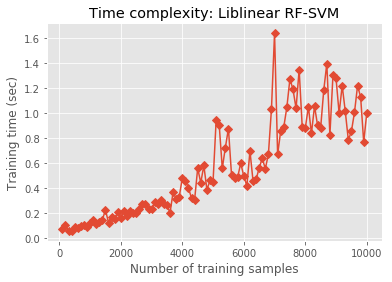

In [16]:
plt.plot(n_samples, time_linear, marker='D')
plt.title("Time complexity: Liblinear RF-SVM")
plt.xlabel('Number of training samples')
plt.ylabel('Training time (sec)')
plt.show()

### Stochastic Gradient SVC

In [48]:
time_sgd = []

for n in samples:
    X, y = datasets.make_classification(n_samples=n)
    
    X_train,X_test, y_train,y_test, idx_train,idx_test = train_test_split(X,y, np.arange(len(X))
                                                                       ,test_size=1/3, stratify=y)
    
    # Rescale input space to [0,1] range (for purposes of consistency and stability)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    t = time.time()

    # Run trees in parallel
    trees = 10
    with Parallel() as parallel:
        parallel(delayed(svc_tree_sgd)(X_train,X_test 
                                                    ,y_train,y_test
                                                    ,idx_train,idx_test) for i in range(1,trees))
        

    training_time = time.time() - t
    time_sgd.append(training_time)

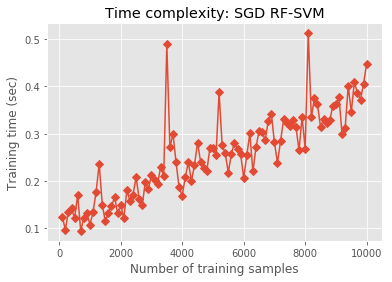

In [52]:
plt.plot(n_samples, time_sgd, marker='D', fill_style="none")
plt.title("Time complexity: SGD RF-SVM")
plt.xlabel('Number of training samples')
plt.ylabel('Training time (sec)')
plt.show()

### Kernel SVC

In [ ]:
time_kernel = []

for n in samples:
    X, y = datasets.make_classification(n_samples=n)
    
    X_train,X_test, y_train,y_test, idx_train,idx_test = train_test_split(X,y, np.arange(len(X))
                                                                       ,test_size=1/3, stratify=y)
    
    # Rescale input space to [0,1] range (for purposes of consistency and stability)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    t = time.time()

    # Run trees in parallel
    trees = 10
    with Parallel() as parallel:
        parallel(delayed(svc_tree_kernel)(X_train,X_test 
                                                    ,y_train,y_test
                                                    ,idx_train,idx_test) for i in range(1,trees))
        

    training_time = time.time() - t
    time_kernel.append(training_time)

# Multiclass Clasification
### LibLinear

In [ ]:
time_linear = []

for n in samples:
    X, y = datasets.make_classification(n_samples=n, n_classes=3)
    #size.append(sys.getsizeof(np.c_[X,y]))
    
    X_train,X_test, y_train,y_test, idx_train,idx_test = train_test_split(X,y, np.arange(len(X))
                                                                       ,test_size=1/3, stratify=y)
    
    # Rescale input space to [0,1] range (for purposes of consistency and stability)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    t = time.time()

    # Run trees in parallel
    trees = 10
    with Parallel() as parallel:
        parallel(delayed(svc_tree_linear)(X_train,X_test 
                                                    ,y_train,y_test
                                                    ,idx_train,idx_test) for i in range(1,trees))
        

    training_time = time.time() - t
    time_linear.append(training_time)

### SGD

In [14]:
time_sgd = []

for n in n_samples:
    X, y = datasets.make_classification(n_samples=n)
    
    X_train,X_test, y_train,y_test, idx_train,idx_test = train_test_split(X,y, np.arange(len(X))
                                                                       ,test_size=1/3, stratify=y)
    
    # Rescale input space to [0,1] range (for purposes of consistency and stability)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    t = time.time()

    # Run trees in parallel
    trees = 10
    with Parallel() as parallel:
        parallel(delayed(svc_tree_sgd)(X_train,X_test 
                                                    ,y_train,y_test
                                                    ,idx_train,idx_test) for i in range(1,trees))
        

    training_time = time.time() - t
    time_sgd.append(training_time)

# tuned SVC

In [14]:
time_kernel = []

for n in n_samples:
    X, y = datasets.make_classfication(n_samples=n)
    
    X_train,X_test, y_train,y_test, idx_train,idx_test = train_test_split(X,y, np.arange(len(X))
                                                                       ,test_size=1/3, stratify=y)
    
    # Rescale input space to [0,1] range (for purposes of consistency and stability)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    t = time.time()

    # Run trees in parallel
    trees = 10
    with Parallel() as parallel:
        parallel(delayed(svc_tree_kernel)(X_train,X_test 
                                                    ,y_train,y_test
                                                    ,idx_train,idx_test) for i in range(1,trees))
        

    training_time = time.time() - t
    time_kernel.append(training_time)

# Regression

In [ ]:
%run 'SVM_RF_Regression.ipynb'

In [14]:
time_linear = []

for n in samples:
    X, y = datasets.make_regression(n_samples=n)
    
    X_train,X_test, y_train,y_test, idx_train,idx_test = train_test_split(X,y, np.arange(len(X))
                                                                       ,test_size=1/3)
    
    # Rescale input space to [0,1] range (for purposes of consistency and stability)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    t = time.time()

    # Run trees in parallel
    trees = 10
    with Parallel() as parallel:
        parallel(delayed(svr_tree_kernel)(X_train,X_test 
                                                    ,y_train,y_test
                                                    ,idx_train,idx_test) for i in range(1,trees))
        

    training_time = time.time() - t
    time_linear.append(training_time)

KeyboardInterrupt: 

In [ ]:
time_sgd = []

for n in n_samples:
    X, y = datasets.make_regression(n_samples=n)
    
    X_train,X_test, y_train,y_test, idx_train,idx_test = train_test_split(X,y, np.arange(len(X))
                                                                       ,test_size=1/3)
    
    # Rescale input space to [0,1] range (for purposes of consistency and stability)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    t = time.time()

    # Run trees in parallel
    trees = 10
    with Parallel() as parallel:
        parallel(delayed(svr_tree_sgd)(X_train,X_test 
                                                    ,y_train,y_test
                                                    ,idx_train,idx_test) for i in range(1,trees))
        

    training_time = time.time() - t
    time_kernel.append(training_time)

In [ ]:
time_kernel = []

for n in n_samples:
    X, y = datasets.make_regression(n_samples=n)
    
    X_train,X_test, y_train,y_test, idx_train,idx_test = train_test_split(X,y, np.arange(len(X))
                                                                       ,test_size=1/3)
    
    # Rescale input space to [0,1] range (for purposes of consistency and stability)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    t = time.time()

    # Run trees in parallel
    trees = 10
    with Parallel() as parallel:
        parallel(delayed(svr_tree_kernel)(X_train,X_test 
                                                    ,y_train,y_test
                                                    ,idx_train,idx_test) for i in range(1,trees))
        

    training_time = time.time() - t
    time_kernel.append(training_time)